In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel("merc.xlsx")

In [3]:
dataFrame.head() # Burada mpg = mile per gallon yani mile(km) başına ne kadar yakıt yakıyor.

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [4]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
# 13 bin tane veriden null veri varsa bu null verileri ya sil ya da ortalama bir rakamla doldur.
dataFrame.isnull().sum() # .sum() ile toplam hangi kolonla ilgili kaç tane null değer varsa onu gösterir. Burada tüm verilerin var olduğunu gördük, hepsi 0 geldi. Yani veri setimizde boş(null) bir veri yok. 

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


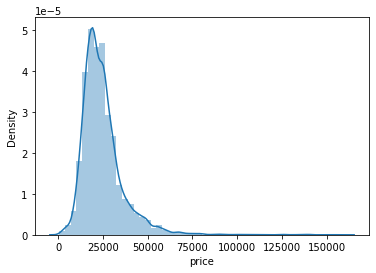

In [7]:
sbn.distplot(dataFrame["price"])
plt.show()

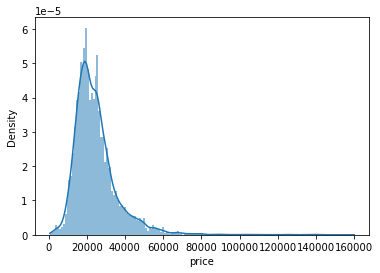

In [8]:
sbn.histplot(dataFrame["price"],kde=True,stat="density", linewidth=0)
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

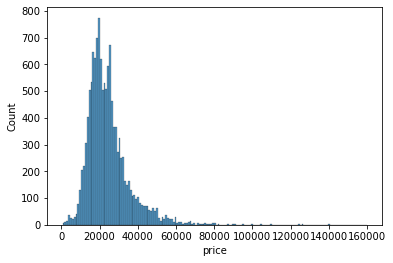

In [9]:
sbn.histplot(dataFrame["price"])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


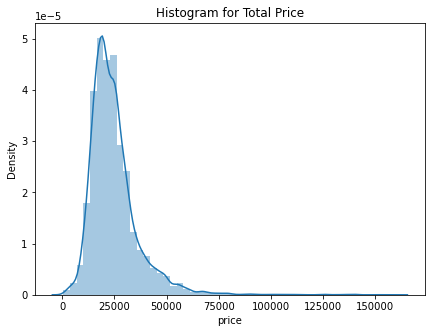

In [10]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["price"],kde=True)
plt.title("Histogram for Total Price")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


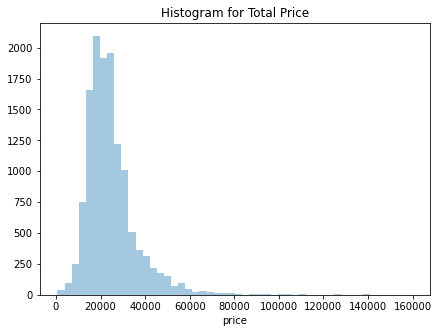

In [11]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["price"],kde=False)
plt.title("Histogram for Total Price")
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

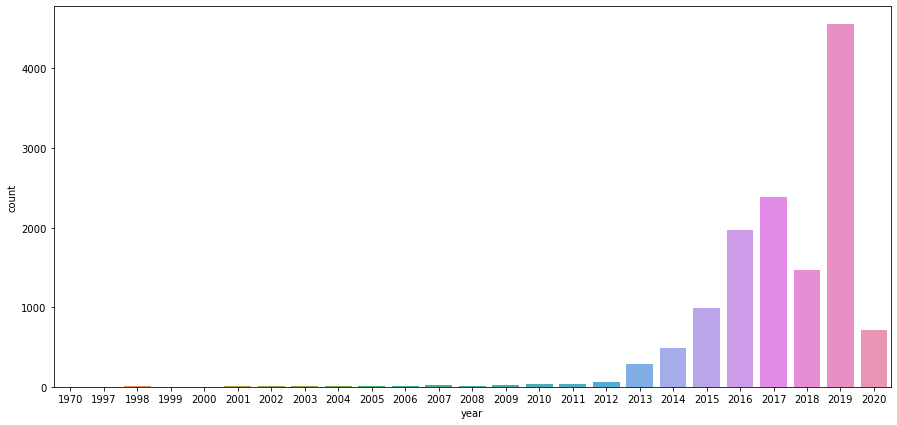

In [12]:
# Yıllara göre sayı miktarını görmek için:
plt.figure(figsize=(15,7))
sbn.countplot(dataFrame["year"]) # countplot: kaç tane olduğunu göster demektir.

In [13]:
# verilerin birbiri ile korelasyonu
# price kolonunun year,mileage'a göre değişimi :
dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [14]:
dataFrame.corr()["price"]

year          0.520712
price         1.000000
mileage      -0.537214
tax           0.268717
mpg          -0.438445
engineSize    0.516126
Name: price, dtype: float64

In [15]:
dataFrame.corr()["price"].sort_values()
# Görüldüğü gibi en çok price'ı etkileyen yıl gibi. Çünkü 2020deki araba en pahalıdır.
# engineSize'da price'ı pozitif etkiliyormuş
# tax(vergi) de yani verginin fazla oluşu fiyatı pozitif etkiliyormuş.
# mpg yani 1 milde/kmde kaç yaktığı bilgisi negatif etkiler.
# Tabii ki en negatif price'ı etkileyen mileage(km)'dir.

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [16]:
# transmission kolonunu dataFrame.describe() yazınca göremedik. Çünkü sayısal bir değeri yok. Bu yüzden regresyona'da sokamayız. Bunu daha sonra dataFrame'den atabiliriz.
# Ya da otomatiklere 1 manuellere 0 yazıp verileştirmeye çalışabiliriz.

<AxesSubplot:xlabel='mileage', ylabel='price'>

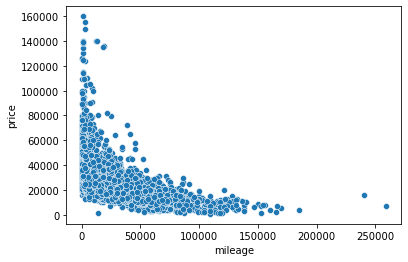

In [17]:
# mil(km) arttıkça price'ın azaldığını gösteren bir grafik.
# Burada x'e her zaman featurelardan birini y'e gitmek(ulaşmak) istediğimiz veri olarak düşünüyoruz.
# x'e en negatif korelasyonlu olan mileage'ı seçti:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)

In [18]:
# En yüksek fiyatlı 20 arabayı fiyatı azalan şekilde ekrana getir :
dataFrame.sort_values("price",ascending=False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [19]:
len(dataFrame)

13119

In [20]:
# Bir verinin % 99'unu alırsanız o verinin yansıttığı genel tabloyu bozmadan işlemlere devam edebiliriz.
# Yani 13 bin tane veriden 131 tane çıkarsam modelim bozulmaz.
len(dataFrame) * 0.01

131.19

In [21]:
# Amaç : En yüksek 131 fiyatlı arabayı bul ve veri setinden sil.
# En yüksek fiyatlı arabalardan 131'den sonrası ile devam et. İlk 0'dan 130'a kadar olan en yüksek fiyatlı arabaları alma demek için:
yuzdeDoksanDokuzDf = dataFrame.sort_values("price",ascending = False).iloc[131:]

In [22]:
yuzdeDoksanDokuzDf.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

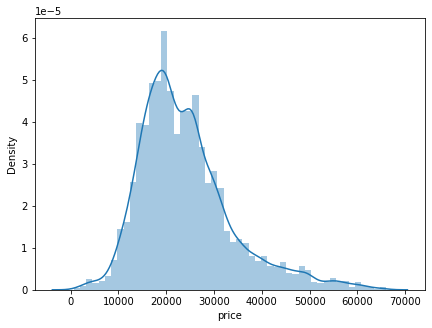

In [23]:
plt.figure(figsize=(7,5))
sbn.distplot(yuzdeDoksanDokuzDf["price"])

In [24]:
# orijinal dataFrame yine duruyor.
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [25]:
dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [26]:
yuzdeDoksanDokuzDf.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [27]:
# 1970 yılında 25 bin pound'a satılan arabayı veri setinden çıkarmak istersek:
dataFrame[dataFrame.year!=1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [28]:
dataFrame = yuzdeDoksanDokuzDf

In [29]:
dataFrame.describe() # Artık % 1 veriyi attık.Elimizde 12.988 veri kaldı.

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [30]:
dataFrame = dataFrame[dataFrame.year!=1970] # 1970 yılını attı.

In [31]:
dataFrame.sort_values("year",ascending=True) # Görüldüğü gibi artık 1970 yok

,year,price,transmission,mileage,tax,mpg,engineSize
11912,1997,9995,Automatic,76000,255,28.2,3.2
11860,1998,10450,Automatic,49000,255,28.2,3.2
11808,1998,1990,Automatic,113557,265,32.1,2.3
11764,1998,1990,Automatic,99300,265,32.1,2.3
11794,1998,19990,Automatic,43534,265,23.3,6.0
...,...,...,...,...,...,...,...
5217,2020,43995,Semi-Auto,859,145,32.1,2.0
1947,2020,29995,Semi-Auto,5000,145,56.5,2.0
9283,2020,24995,Manual,9,145,47.1,1.3
4105,2020,26890,Semi-Auto,2498,145,37.2,1.6


In [32]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [33]:
# transmission diye numeric değere sahip olmayan bir kolon var.
# Bu şekilde regresyona sokarsak hata verir. O yüzden transmission kolonunu drop et.
dataFrame = dataFrame.drop("transmission",axis=1)

In [34]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


In [35]:
y = dataFrame["price"].values # numpy dizisine çevirdik.
x = dataFrame.drop("price",axis=1).values # price harici tüm featureları girdi olarak al.

In [36]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [37]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# x ve y dizilerimizi eğiteceğimiz(train edeceğimiz) ve test yapacağımız diziye böl:
# random_state test ve train'e bölünme işleminin rastgele olacak şekilde yapıldığı ama aynı zamanda tekrar aynı rastgele değerler almak istiyorsak kullanmak isteyeceğimiz değişken
# random_state=10 alınca veriler yine rastgele train ve test olarak bölünecek ama tekrar çağırıldığında ortalama aynı değerler yine ekrana gelir.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [40]:
len(x_train)

9090

In [41]:
len(x_test) # Totalde 12988 veri vardı. test_size=0.3 yani 12988 verinin %30'u 3897 yapar.

3897

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
x_train = scaler.fit_transform(x_train)

In [44]:
x_test = scaler.transform(x_test)

In [45]:
# Labelı yani ulaşmak istediğimiz değeri yani price'ı scaler etmeye gerek yok.
# Artık tensorflow'u çağırabiliriz :
from tensorflow.keras.models import Sequential # model oluştur.
from tensorflow.keras.layers import Dense # model içerisine katmanları oluştur.

In [46]:
x_train.shape # 9090 data ve 5 tane feature(özellik) var. Bu ilk başta 7 taneydi ama transmission'ı drop ettik ve price'ıda y'e aldık. 5 tane kaldı.

(9090, 5)

In [47]:
x_test.shape

(3897, 5)

In [48]:
model = Sequential()

# model.add(Dense(5,activation="relu")) ile iyi sonuçlar elde edemediği için inputs=12 aldı.
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [49]:
# Artık modeli eğitmeye başlıyoruz:
# Validation verisini model.fit ile daha veri eğitilirken validasyon yapılabilir hale geliyor.
# Bu da bizim daha önceki bölümde yaptığımız x_test ve y_test kıyaslama işlemlerini daha kolay hale getirir.
# Verilerin hepsini bir anda modele vermek modeli yorar. O yüzden batch_size ile verileri partiler(parça parça) halinde veriyoruz.
# Elimizde yaklaşık eğitmeye çalıştığımız 9090 yani 10 bin data var. O yüzden batch_size=250 verilebilir. Mesela 1 milyon veri için batch_size = 1000 verilebilir.
# epochs'u çok yüksek veya çok düşük vermek modelimizin işleyişini bozabilir.
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
37/37 [==============================] - 1s 5ms/step - loss: 672142336.0000 - val_loss: 688097536.0000
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 672113536.0000 - val_loss: 688048704.0000
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 672023808.0000 - val_loss: 687887232.0000
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 671725568.0000 - val_loss: 687364224.0000
Epoch 5/300
37/37 [==============================] - 0s 2ms/step - loss: 670815744.0000 - val_loss: 685832512.0000
Epoch 6/300
37/37 [==============================] - 0s 2ms/step - loss: 668294848.0000 - val_loss: 681803968.0000
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 662115456.0000 - val_loss: 672543936.0000
Epoch 8/300
37/37 [==============================] - 0s 2ms/step - loss: 649036288.0000 - val_loss: 654168704.0000
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 6246874

37/37 [==============================] - 0s 1ms/step - loss: 21783838.0000 - val_loss: 23129860.0000
Epoch 144/300
37/37 [==============================] - 0s 1ms/step - loss: 21736626.0000 - val_loss: 23061710.0000
Epoch 145/300
37/37 [==============================] - 0s 2ms/step - loss: 21714898.0000 - val_loss: 23017742.0000
Epoch 146/300
37/37 [==============================] - 0s 1ms/step - loss: 21684152.0000 - val_loss: 22976162.0000
Epoch 147/300
37/37 [==============================] - 0s 1ms/step - loss: 21612168.0000 - val_loss: 22931014.0000
Epoch 148/300
37/37 [==============================] - 0s 1ms/step - loss: 21586184.0000 - val_loss: 22889766.0000
Epoch 149/300
37/37 [==============================] - 0s 2ms/step - loss: 21552770.0000 - val_loss: 22863848.0000
Epoch 150/300
37/37 [==============================] - 0s 2ms/step - loss: 21500128.0000 - val_loss: 22844440.0000
Epoch 151/300
37/37 [==============================] - 0s 1ms/step - loss: 21470532.0000 - val

37/37 [==============================] - 0s 2ms/step - loss: 19090772.0000 - val_loss: 20650848.0000
Epoch 286/300
37/37 [==============================] - 0s 2ms/step - loss: 19083738.0000 - val_loss: 20662852.0000
Epoch 287/300
37/37 [==============================] - 0s 1ms/step - loss: 19085652.0000 - val_loss: 20627084.0000
Epoch 288/300
37/37 [==============================] - 0s 1ms/step - loss: 19062270.0000 - val_loss: 20627778.0000
Epoch 289/300
37/37 [==============================] - 0s 1ms/step - loss: 19038984.0000 - val_loss: 20656848.0000
Epoch 290/300
37/37 [==============================] - 0s 1ms/step - loss: 19042840.0000 - val_loss: 20615896.0000
Epoch 291/300
37/37 [==============================] - 0s 2ms/step - loss: 19044902.0000 - val_loss: 20588244.0000
Epoch 292/300
37/37 [==============================] - 0s 1ms/step - loss: 19067172.0000 - val_loss: 20591718.0000
Epoch 293/300
37/37 [==============================] - 0s 1ms/step - loss: 19015884.0000 - val

In [50]:
model.history.history

{'loss': [672142336.0,
  672113536.0,
  672023808.0,
  671725568.0,
  670815744.0,
  668294848.0,
  662115456.0,
  649036288.0,
  624687424.0,
  584001344.0,
  522613696.0,
  439592832.0,
  339523296.0,
  237194656.0,
  155251680.0,
  108809344.0,
  92209336.0,
  88314200.0,
  87223184.0,
  86522880.0,
  85893856.0,
  85308816.0,
  84722160.0,
  84163584.0,
  83613192.0,
  83072504.0,
  82534584.0,
  82010800.0,
  81493512.0,
  80970376.0,
  80454640.0,
  79943440.0,
  79431544.0,
  78923032.0,
  78408720.0,
  77886840.0,
  77375056.0,
  76857720.0,
  76332928.0,
  75807984.0,
  75284488.0,
  74761744.0,
  74218464.0,
  73681744.0,
  73130488.0,
  72572080.0,
  72018072.0,
  71446024.0,
  70878952.0,
  70290544.0,
  69707464.0,
  69120800.0,
  68523136.0,
  67899472.0,
  67277232.0,
  66646256.0,
  66009048.0,
  65351460.0,
  64696080.0,
  64024648.0,
  63354292.0,
  62708776.0,
  62018100.0,
  61318624.0,
  60579444.0,
  59861448.0,
  59142540.0,
  58414288.0,
  57683024.0,
  56915764

In [51]:
type(model.history.history)

dict

In [52]:
kayipVerisi = pd.DataFrame(model.history.history)

In [53]:
kayipVerisi.head()

,loss,val_loss
0,672142336.0,688097536.0
1,672113536.0,688048704.0
2,672023808.0,687887232.0
3,671725568.0,687364224.0
4,670815744.0,685832512.0


<AxesSubplot:>

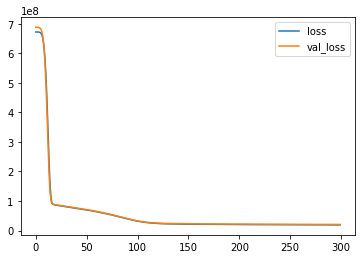

In [54]:
kayipVerisi.plot()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [56]:
# x_test'i vererek y_testi(price'ı) predict etmeye tahmin etmeye çalışıyor:
tahminDizisi = model.predict(x_test)

122/122 [==============================] - 0s 608us/step


In [57]:
tahminDizisi

array([[22239.36 ],
       [22722.367],
       [24880.086],
       ...,
       [25729.613],
       [12916.345],
       [24353.89 ]], dtype=float32)

In [58]:
tahminDizisi.shape

(3897, 1)

In [59]:
# y_test'de gerçek rakamlarımız var.
# Eğer tahminDizisi ile yani yaptığım tahmin dizisiyle y_test'de gerçek rakamlarımızı kıyaslarsak :
mean_absolute_error(tahminDizisi,y_test) # Arada 3.212 pound fark olduğunu görürüz.

3212.746508068509

In [60]:
dataFrame.describe()
# Ortalama price 24 bin pound olduğu için 3.212 pound bu fiyattan sapabiliriz,deriz.

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [61]:
# 3200 % 24000 = 0,13 yani % 13'lük bir fark var

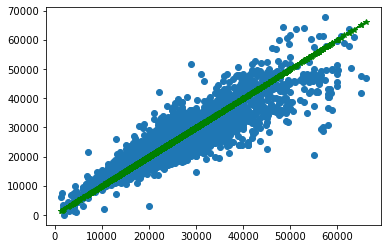

In [62]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [63]:
dataFrame.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [64]:
# Yukarıda verilen arabayı dataFrame'den çıkar.
yeniArabaSeries = dataFrame.drop("price",axis=1).iloc[2]

In [65]:
yeniArabaSeries

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [66]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(1,5))
# yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5)) de olabilir.
# Burada .reshape(1,5) ile 1D'den 2D(2 Boyutlu) matrix arrayi haline getiriyoruz. Çünkü price'a göre 5 tane kolonu(feature'ı) mevcut.
# Artık elimde scaling edilmiş Series'ım var.

In [67]:
yeniArabaSeries

array([[1.        , 0.01543635, 0.25      , 0.12442183, 0.64516129]])

In [68]:
model.predict(yeniArabaSeries) # Sonuç olarak 65980.0 satılmış bir şeyin price'ını 62093.06 olarak predict etti.

1/1 [==============================] - 0s 13ms/step


array([[62093.06]], dtype=float32)